### Objectif

<h5> upon install inspection of the data, we can start thinking of some questions about it that we would want to answer</h5>

<ol>l  what is the overol sales trend?</ol>
<ol>what are the top 10 products by sales</ol>
<ol> what are the most selling products?</ol>
<ol>which is the most preferred ship mode</ol>
<ol>which are the most profitable category and sub-category?</ol>

<h4>importing required libraries</h4>

In [96]:
#data manipulation
import pandas as pd
#data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### importing the dataset

In [97]:
df=pd.read_excel('/kaggle/input/store-sales/superstore_sales (1).xlsx')

### data audit

In [98]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [99]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [100]:
#shape of the dataset
df.shape

(51290, 21)

In [101]:
#columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [102]:
# a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [103]:
#checking missing values
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        order_id  order_date  ship_date  ship_mode  customer_name  segment  \
0         False       False      False      False          False    False   
1         False       False      False      False          False    False   
2         False       False      False      False          False    False   
3         False       False      False      False          False    False   
4         False       False      False      False          False    False   
...         ...         ...        ...        ...            ...      ...   
51285     False       False      False      False          False    False   
51286     False       False      False      False          False    False   
51287     False       False      False      False          False    False   
51288     False       False      False      False          False    False   
51289     False       False      False      False          False    False   

       state 

In [104]:
#getting descriptive statistics summary
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


### exploratory data analysis

<h4>what is the overall sales trend?</h4>

In [105]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [106]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [107]:
# getting month year from the dataset
df['month_year']=df['order_date'].apply(lambda x: x.strftime('%y-%m'))

In [108]:
df['month_year']

0        11-01
1        11-01
2        11-01
3        11-01
4        11-01
         ...  
51285    14-12
51286    14-12
51287    14-12
51288    14-12
51289    14-12
Name: month_year, Length: 51290, dtype: object

In [109]:
#getting month year 
df_trend=df.groupby('month_year')['sales'].sum().reset_index()
df_trend

,month_year,sales
0,11-01,98898.48886
1,11-02,91152.15698
2,11-03,145729.36736
3,11-04,116915.76418
4,11-05,146747.83610
5,11-06,215207.38022
6,11-07,115510.41912
7,11-08,207581.49122
8,11-09,290214.45534
9,11-10,199071.26404


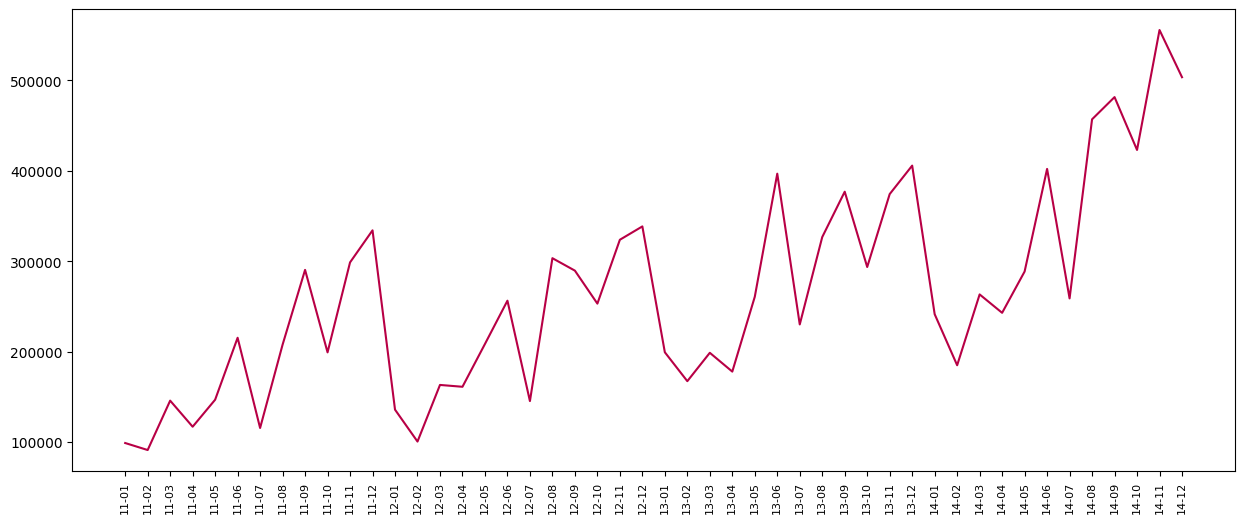

In [110]:
#setting the figure size
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'],df_trend['sales'],color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

## which are the top 10 products by sales?

In [111]:
#grouping product name column
prod_sales=pd.DataFrame(df.groupby('product_name').sum('sales'))
 

In [112]:
#sorting prod sales column
prod_sales=prod_sales.sort_values('sales',ascending=False)

In [113]:
#top 10 products by sales
prod_sales[:10]

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"Apple Smart Phone, Full Size",86935.7786,171,5.44,5921.5786,8027.71500,102654
"Cisco Smart Phone, Full Size",76441.5306,139,2.07,17238.5206,7065.16600,76495
"Motorola Smart Phone, Full Size",73156.3030,134,5.61,17027.1130,8817.33100,76498
"Nokia Smart Phone, Full Size",71904.5555,147,6.79,9938.1955,7852.66300,94594
Canon imageCLASS 2200 Advanced Copier,61599.8240,20,0.60,25199.9280,1276.32054,10068
"Hon Executive Leather Armchair, Adjustable",58193.4841,169,8.11,5997.2541,5751.54100,98638
"Office Star Executive Leather Armchair, Adjustable",50661.6840,141,6.47,4710.9840,5141.73400,90577
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160,142,6.98,10427.3260,6548.16500,78499
"Samsung Smart Phone, Cordless",48653.4600,108,3.26,-198.0900,5892.07400,52319


####   which are the most selling products?

In [114]:
#grouping product name
most_sell_prod=pd.DataFrame(df.groupby('product_name')['quantity'].sum().reset_index())
most_sell_prod

,product_name,quantity
0,"""While you Were Out"" Message Book, One Form pe...",8
1,"#10 Gummed Flap White Envelopes, 100/Box",11
2,#10 Self-Seal White Envelopes,10
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,24
3784,iOttie HLCRIO102 Car Mount,12
3785,iOttie XL Car Mount,14
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,29


In [115]:
#sorting most_sell_prod
most_sell_prod=most_sell_prod.sort_values('quantity',ascending=False)
most_sell_prod[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


#### which is the most preferred ship mode

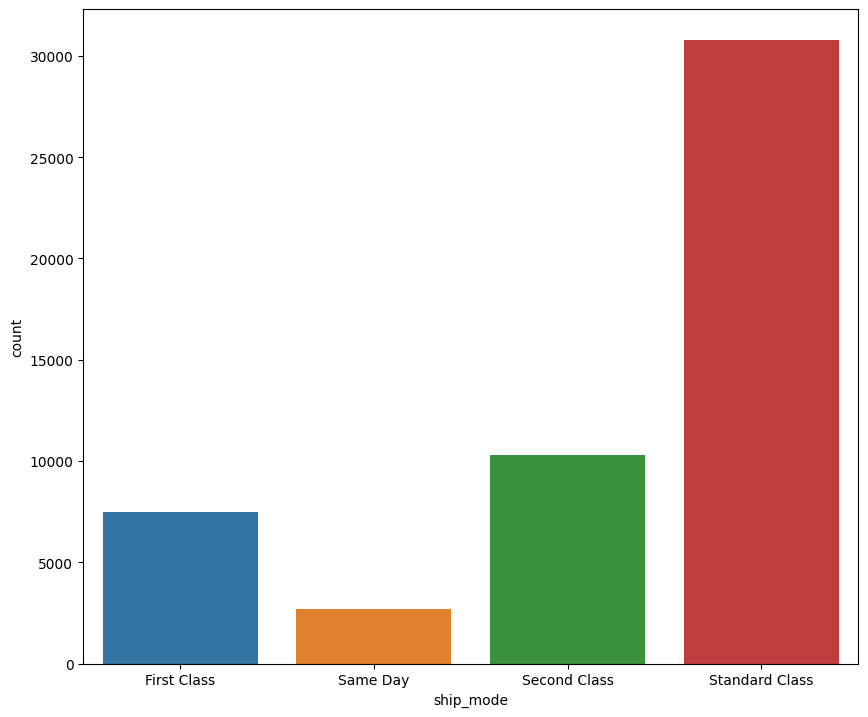

In [116]:
#setting figure size
plt.figure(figsize=(10,8.5))
#ploting shipmode
df['ship_mode'] = df['ship_mode'].astype('category')
sns.countplot(data=df, x='ship_mode')
plt.show()

#### which are the most profitable category and sub-category?

In [117]:
#grouping category and subcategory
cat_subcat_profit=pd.DataFrame(df.groupby(['category', 'sub_category'])['profit'].sum().reset_index())


In [118]:
#sorting the values
cat_subcat_profit.sort_values(['category','profit'],ascending=False)

,category,sub_category,profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630
